## Surviving on Minimum Wage in the US

In [1]:
import pandas as pd
import math
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

Depending on where you live in the United States, the amount you need to make to get by and support a family can vary by a lot. While a family of four, that being two adults and two children, can make do with less than $60k in Arkansas, that same family would need to earn around 88k USD in New York to survive.

In [2]:
df = pd.read_csv('us-income-exp.csv', encoding = "ISO-8859-1", thousands=r',')
cols = df.columns.drop(['State', 'Code'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

### Minimum Required Annual Income, Family of Four

This map shows the minimum amount necessary to meet basic needs for a family of four without relying on outside help, including factors such as housing, food, child care and health insurance, in addition to other regular costs. The data is pulled from [MIT’s living wage calculator](http://livingwage.mit.edu/), which determines the minimum amount necessary to meet basic needs without dipping into poverty or relying on outside help. The calculation considers variables like food, housing, child care and health insurance, as well as other costs, and doesn’t include conveniences or luxuries such as restaurant meals, vacations or investments.

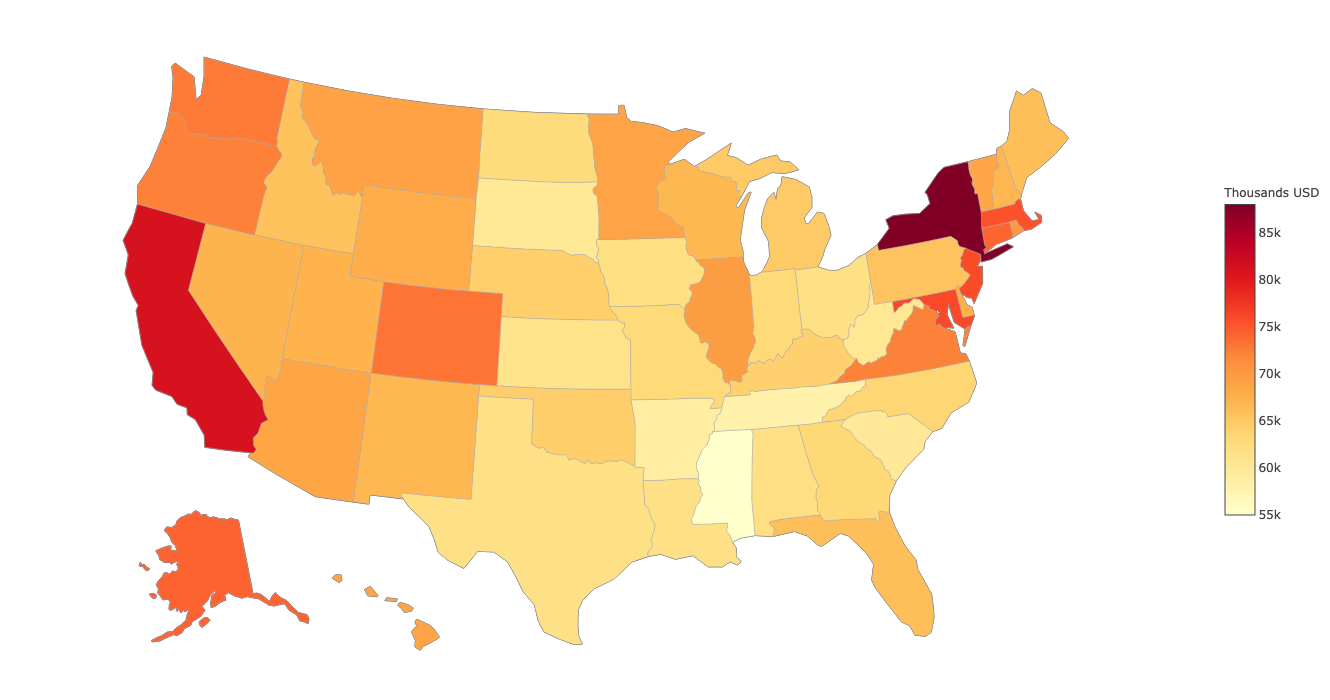

In [3]:
plotmap = [ dict(
        type = 'choropleth',
        locations = df['Code'],
        locationmode = 'USA-states',
        z = df['Required Annual Income Before Taxes'],
        text = df['State'],
        colorscale = 'YlOrRd',
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar =go.choropleth.ColorBar(
            title = 'Thousands USD',
            len=0.5
        ),
      ) ]

layout = dict(
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    geo = dict(
        showframe = False,
        showcoastlines = False,
        scope = 'usa',
        projection = dict(
            type = 'albers usa'
        )
    ),
     height=700,
    width=900
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

### Minimum Annual Salaries

The problem here is that the those workers on a minimum wage are not earning a *living wage*. Using the [US Minimum Wage Calculator](https://goodcalculators.com/us-minimum-wage-calculator/) we can see how much someone earns per year on a minimum wage in each state. To keep the analysis in line with the map above, I've multiplied the minimum annual salary by 2, to account for a family of four. 

The federal minimum wage stands at $7.25, and has been that since 2009. In addition to the federal wage, there are rates set in other states. Many states have their own state-wide minimum wage legislation. These are set by the governing bodies of each state, and they deal with setting the rates and decreeing the laws around minimum wage in their boundary. Whichever is the higher of the state minimum wage and the federal minimum wage is the one that employers must pay their hourly staff. Note that these figures are *before tax*.

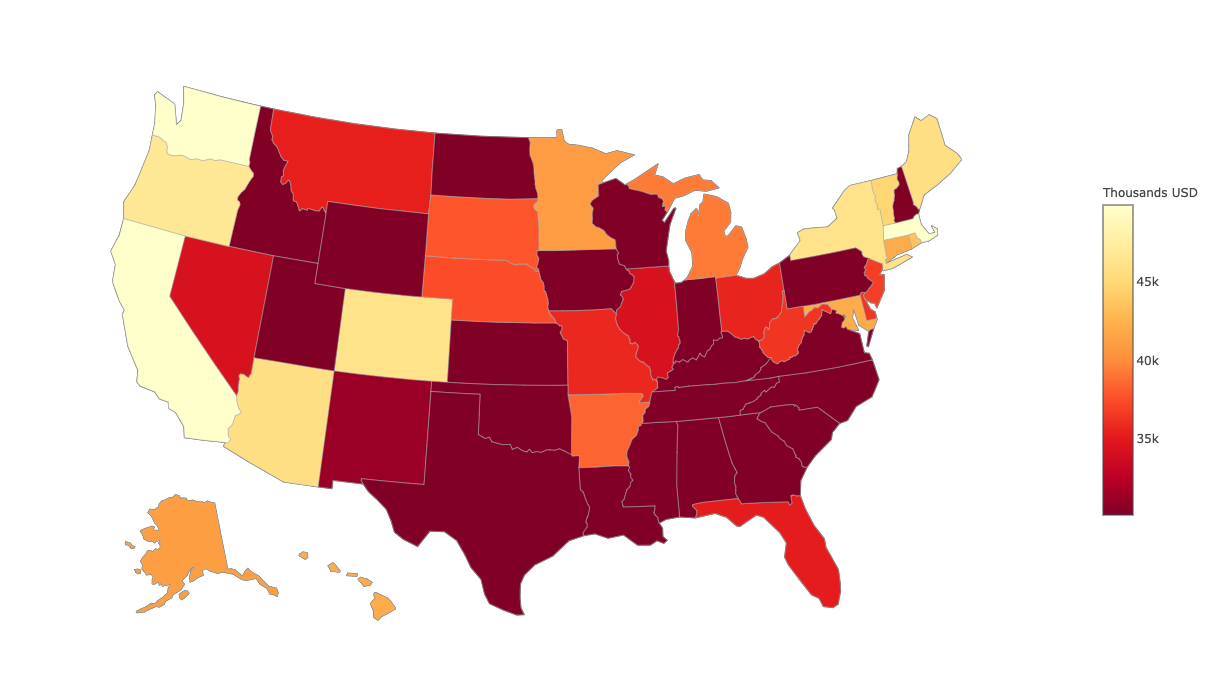

In [37]:
plotmap = [ dict(
        type = 'choropleth',
        locations = df['Code'],
        locationmode = 'USA-states',
        z = df['Minimum Annual Salaries (2 Adults)'],
        text = df['State'],
        colorscale = 'YlOrRd',
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar =go.choropleth.ColorBar(
            title = 'Thousands USD',
            len=0.5
        ),
      ) ]

layout = dict(
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    geo = dict(
        showframe = False,
        showcoastlines = False,
        scope = 'usa',
        projection = dict(
            type = 'albers usa'
        )
    ),
     height=700,
    width=900
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

### Required Annual Income vs Minimum Wage Annual Salary, Before Tax

Now, do these minimum salaries come anywhere close to the minimum required annual income in any state?

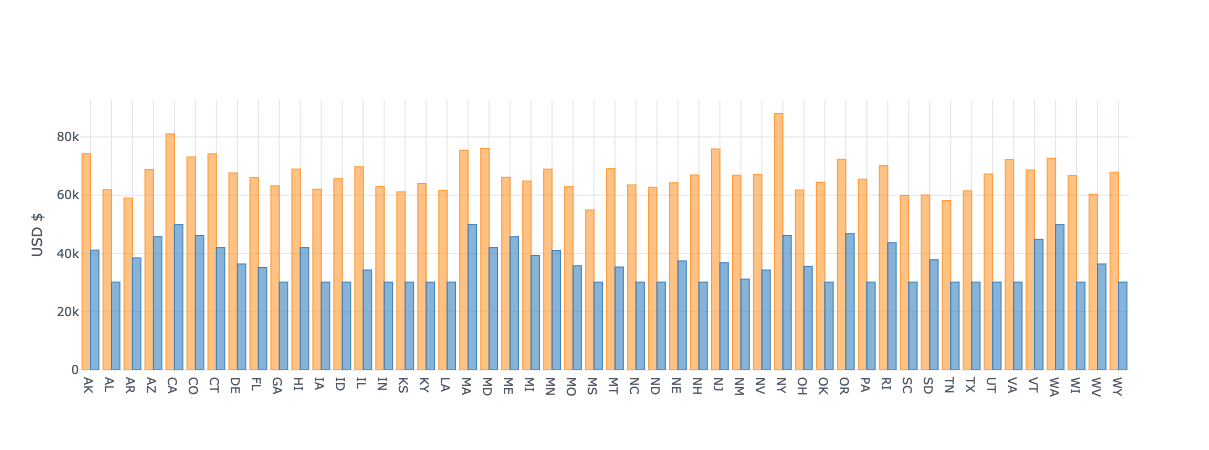

In [31]:
df.groupby('Code')['Required Annual Income Before Taxes','Minimum Annual Salaries (2 Adults)'].sum().iplot(
    kind='bar', mode='group', theme='white', yTitle='USD $', showlegend=False)

The answer is no. The bottom line is that the federal minimum wage hasn't met the cost of living for over 40 years now. Despite a growing movement among workers and government to raise it, proposals are continue to be stalled in Congress as Republicans generally line up against such legislation. 

The government currently spends about seven and a half billion dollars on income-support programs; that's the extent to which employers are being subsidized by the taxpayer. While prices continue to rise, wages have been stagnating, meaning that taxpayers make up the difference.

The idea that raising the minimum wage would be bad for businesses and the economy overall has been consistently debunked, and can in fact act as an economic stimulus, rather than a hinderance, as it boosts the spending power of millions. Why? Because the marginal propensity to consume of high-income earners is substantially less than that of low-income earners.

Regardless of all these economic arguments, just consider the moral one. No working individual should be living below the poverty line in any developed nation.

#Testing.